# Feature Effect Evaluation

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>

<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

In [1]:
config_file = "../../config_sim_simple_scenarios_20.ini"

# set up of example
sim_no = 1
n_train = 1000
snr = 10
groundtruth_effect = "empirical"

In [2]:
from configparser import ConfigParser
from joblib import load
import pandas as pd
from IPython.display import Markdown as md

from feature_effect_empirical_analysis.plotting.plots import boxplot_feature_effect_results, plot_effect_comparison
from feature_effect_empirical_analysis.data_generating.data_generation import generate_data

In [3]:
config = ConfigParser()
config.read(config_file)

['../../config_sim_simple_scenarios_20.ini']

## PDP

### Error of Model-PD compared to groundtruth-PD

In [4]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("pdp_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,mean_squared_error,0.994344,1.413879,3.558854e-04,9.373975e-03
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,1.709604,3.355250,4.212022e-04,3.152384e-03
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.007321,0.018133,1.136923e-04,9.506642e-05
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,mean_squared_error,0.004619,0.004513,1.082148e-08,1.082148e-08
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.027139,0.024859,8.144461e-04,2.079953e-03
...,...,...,...,...,...,...,...,...,...,...,...
152,0,SVM-RBF_16_1000_10,SVM-RBF,16,1000,10.0,mean_squared_error,0.027986,0.289744,5.704737e-04,2.274244e-04
153,0,GAM-2add-cor_16_1000_10,GAM-2add-cor,16,1000,10.0,mean_squared_error,0.004577,0.002131,3.868216e-05,3.868216e-05
154,0,GAM-4-full_16_1000_10,GAM-4-full,16,1000,10.0,mean_squared_error,0.005882,0.005905,6.332989e-04,5.431306e-04
155,0,XGBoost-2add-cor_16_1000_5,XGBoost-2add-cor,16,1000,5.0,mean_squared_error,0.815565,4.023639,1.827564e-03,1.701773e-03


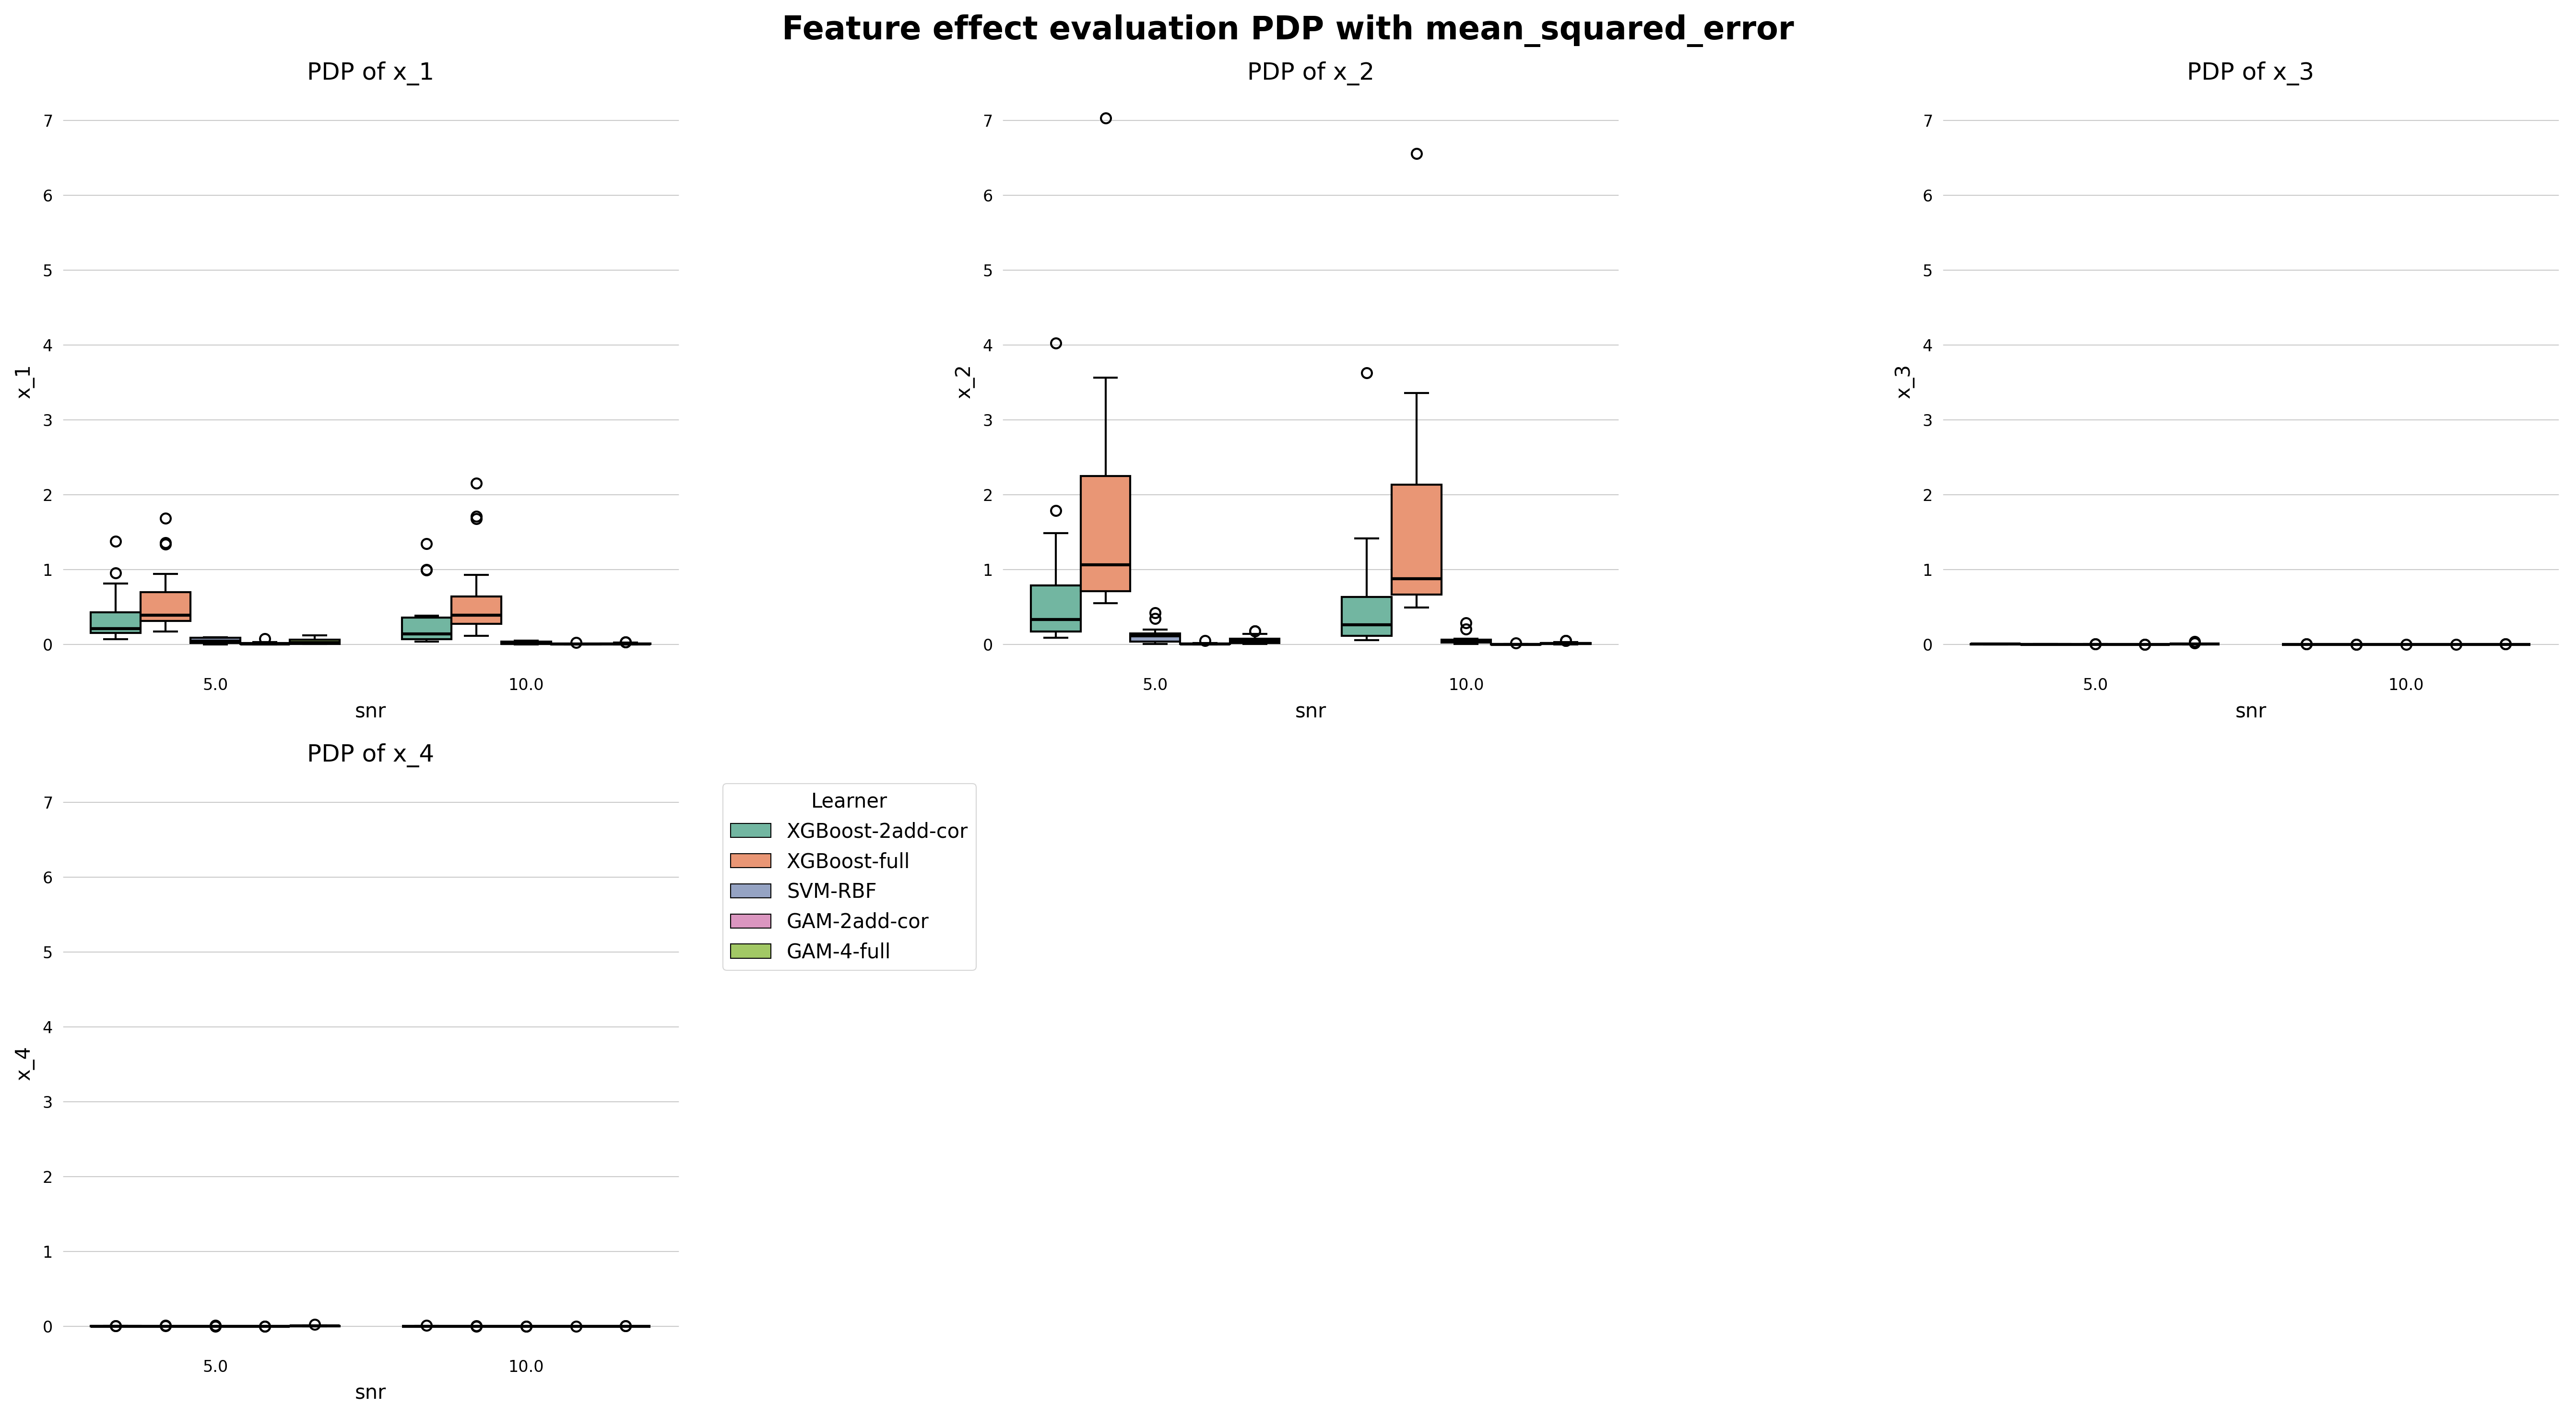

In [5]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4"], df=df, effect_type="PDP");

### PDP example visualizations

In [6]:
md(f"(simulation no. {sim_no} with n_train={n_train} and snr={snr})")

(simulation no. 1 with n_train=1000 and snr=10)

In [7]:
# init groundtruth
groundtruth = load("../groundtruth.joblib")
# recreate dataset
X_train, y_train, X_test, y_test = generate_data(groundtruth, n_train, 1000, snr, seed=1)
# load models
gam_cor = load(f'../models/GAM-2add-cor_{sim_no}_{n_train}_{snr}.joblib')
gam_full = load(f'../models/GAM-4-full_{sim_no}_{n_train}_{snr}.joblib')
xgb_full = load(f'../models/XGBoost-full_{sim_no}_{n_train}_{snr}.joblib')
xgb_cor = load(f'../models/XGBoost-2add-cor_{sim_no}_{n_train}_{snr}.joblib')
svm = load(f'../models/SVM-RBF_{sim_no}_{n_train}_{snr}.joblib')

c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


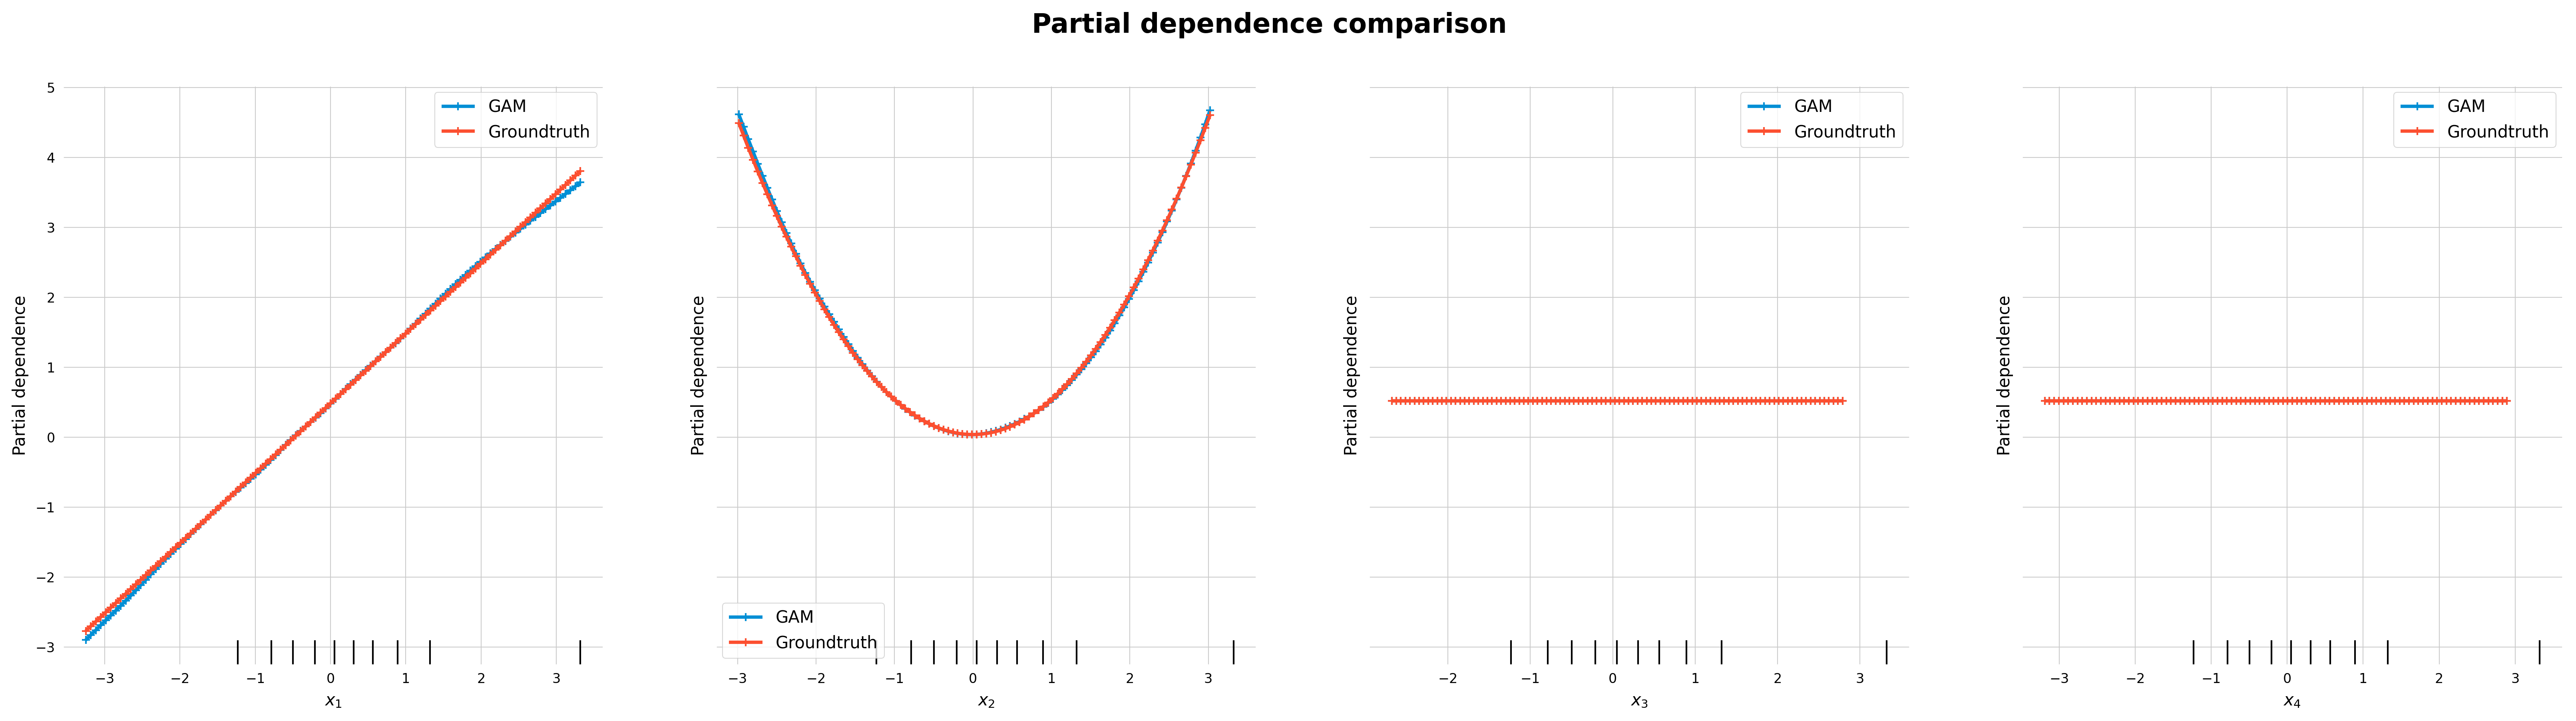

In [8]:
%matplotlib inline
plot_effect_comparison(gam_cor, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

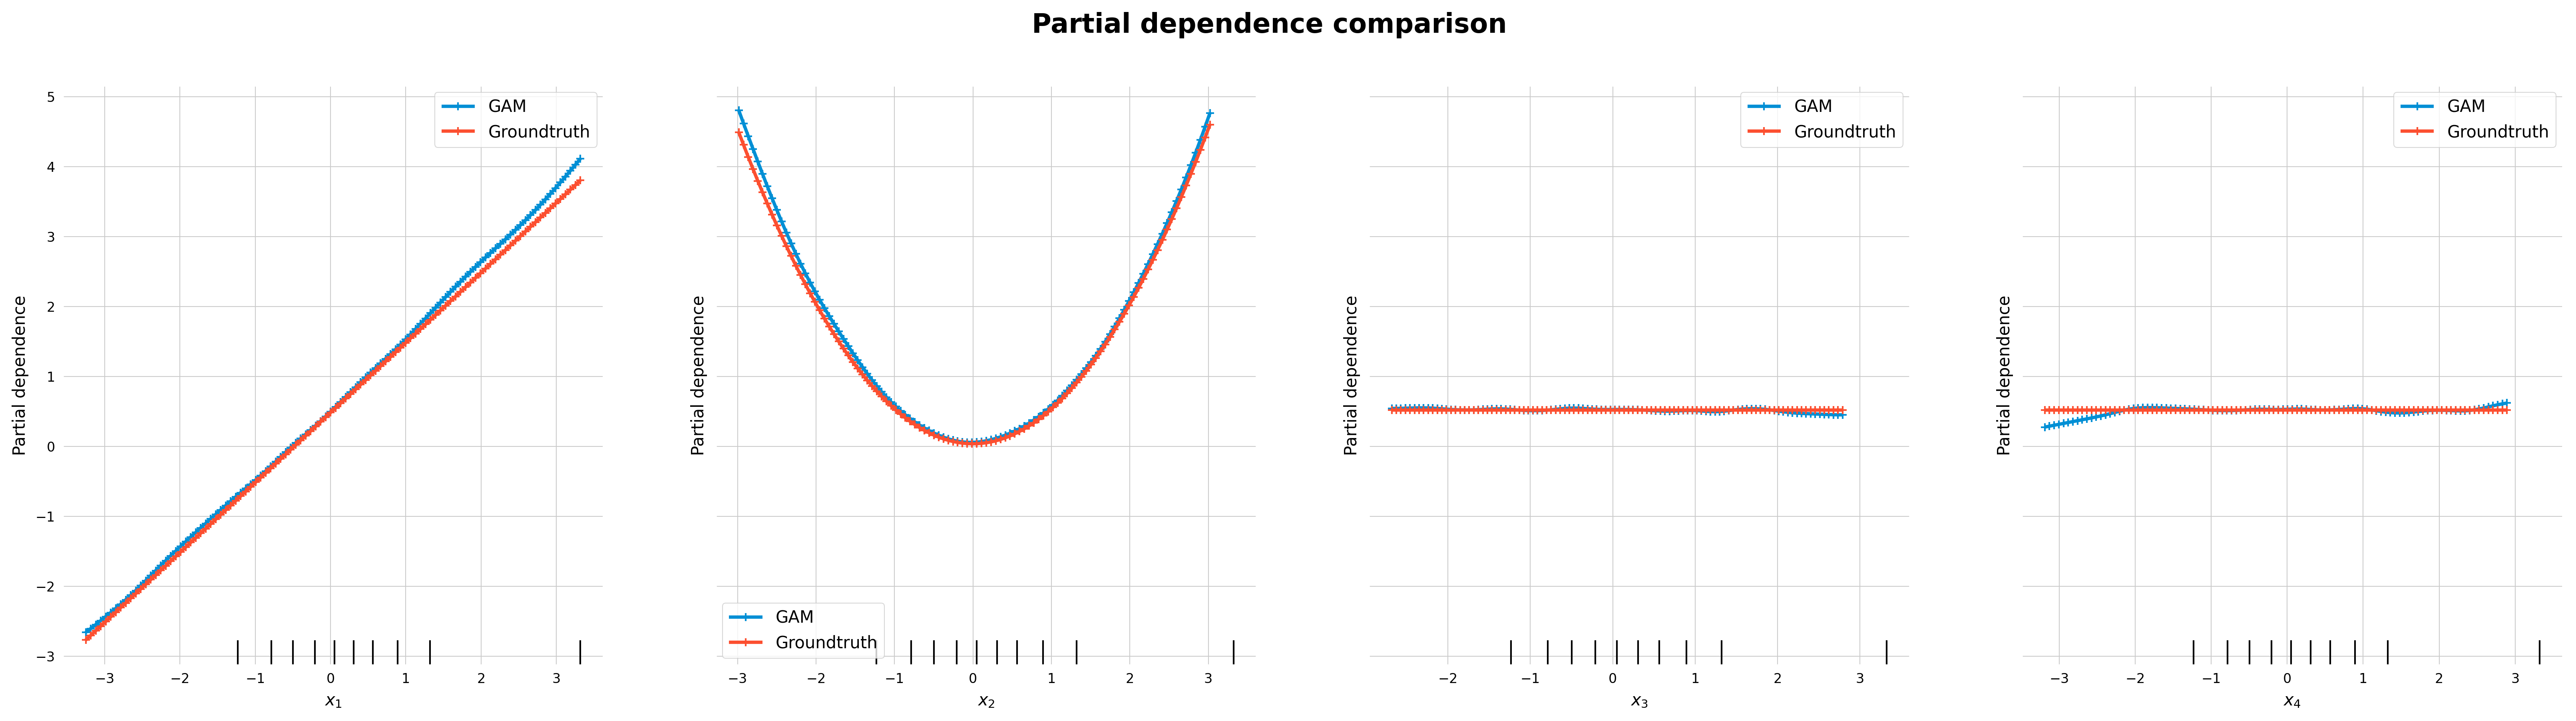

In [9]:
%matplotlib inline
plot_effect_comparison(gam_full, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

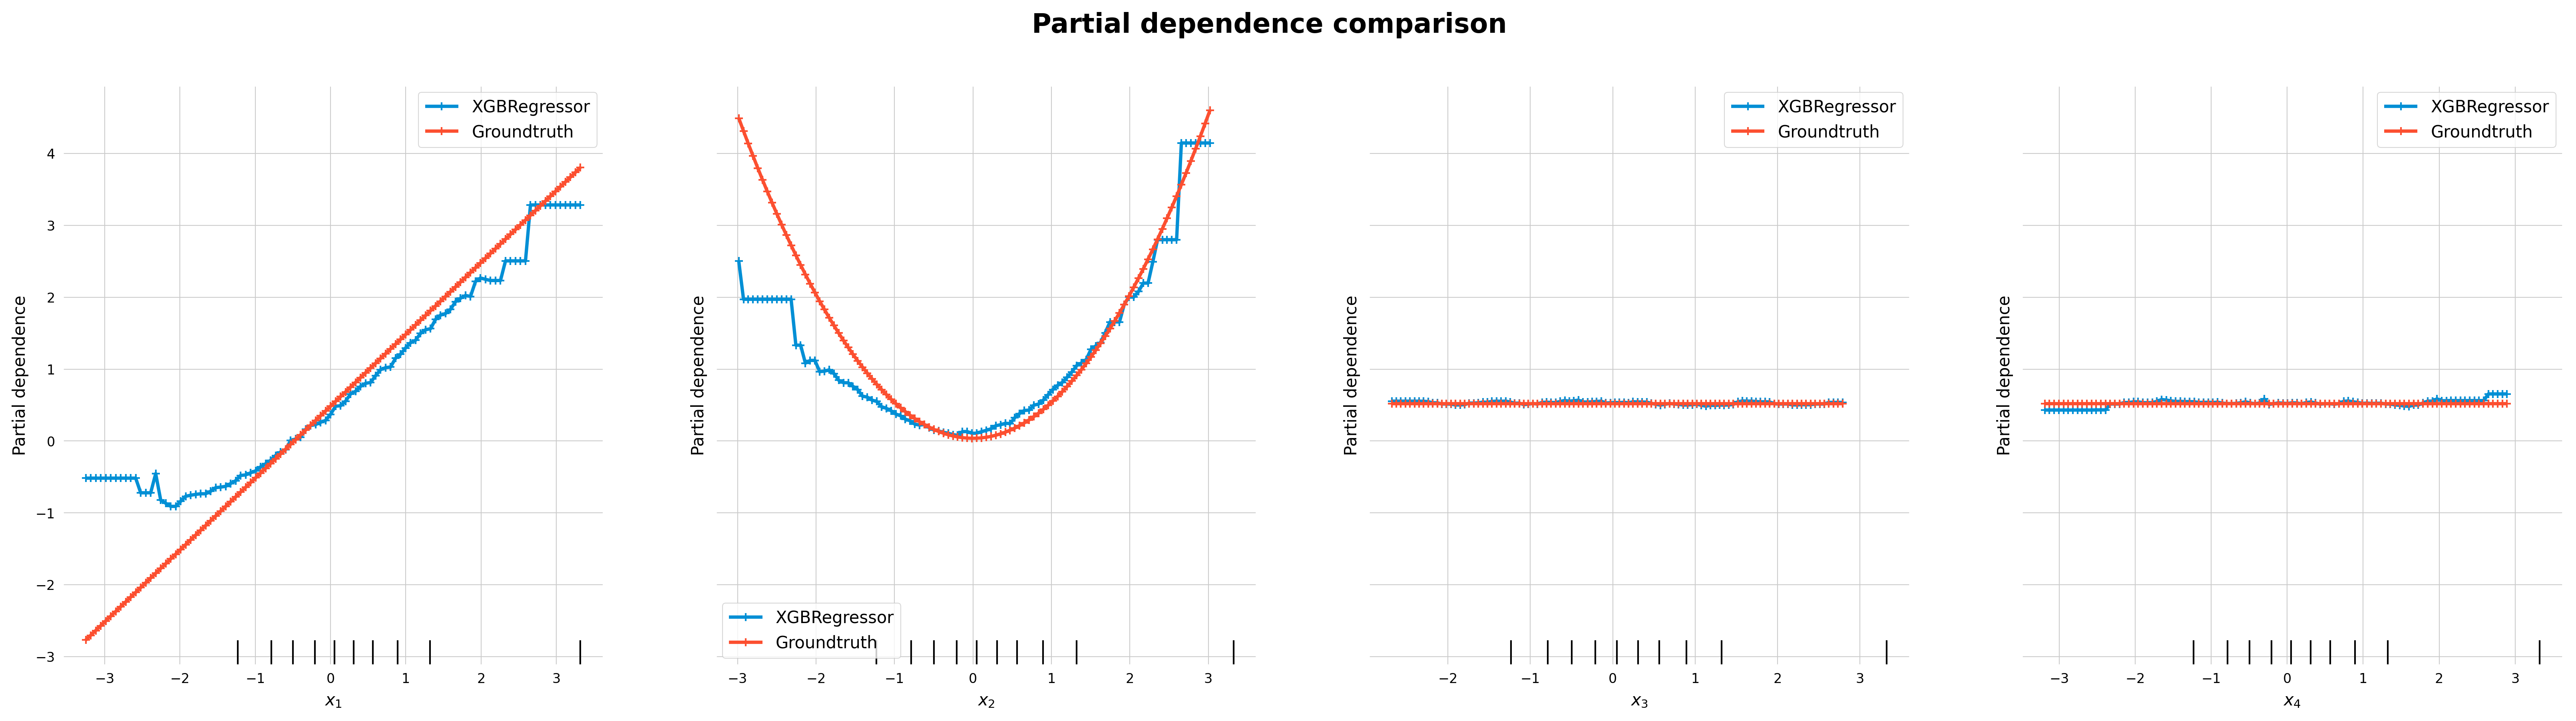

In [10]:
%matplotlib inline
plot_effect_comparison(xgb_full, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

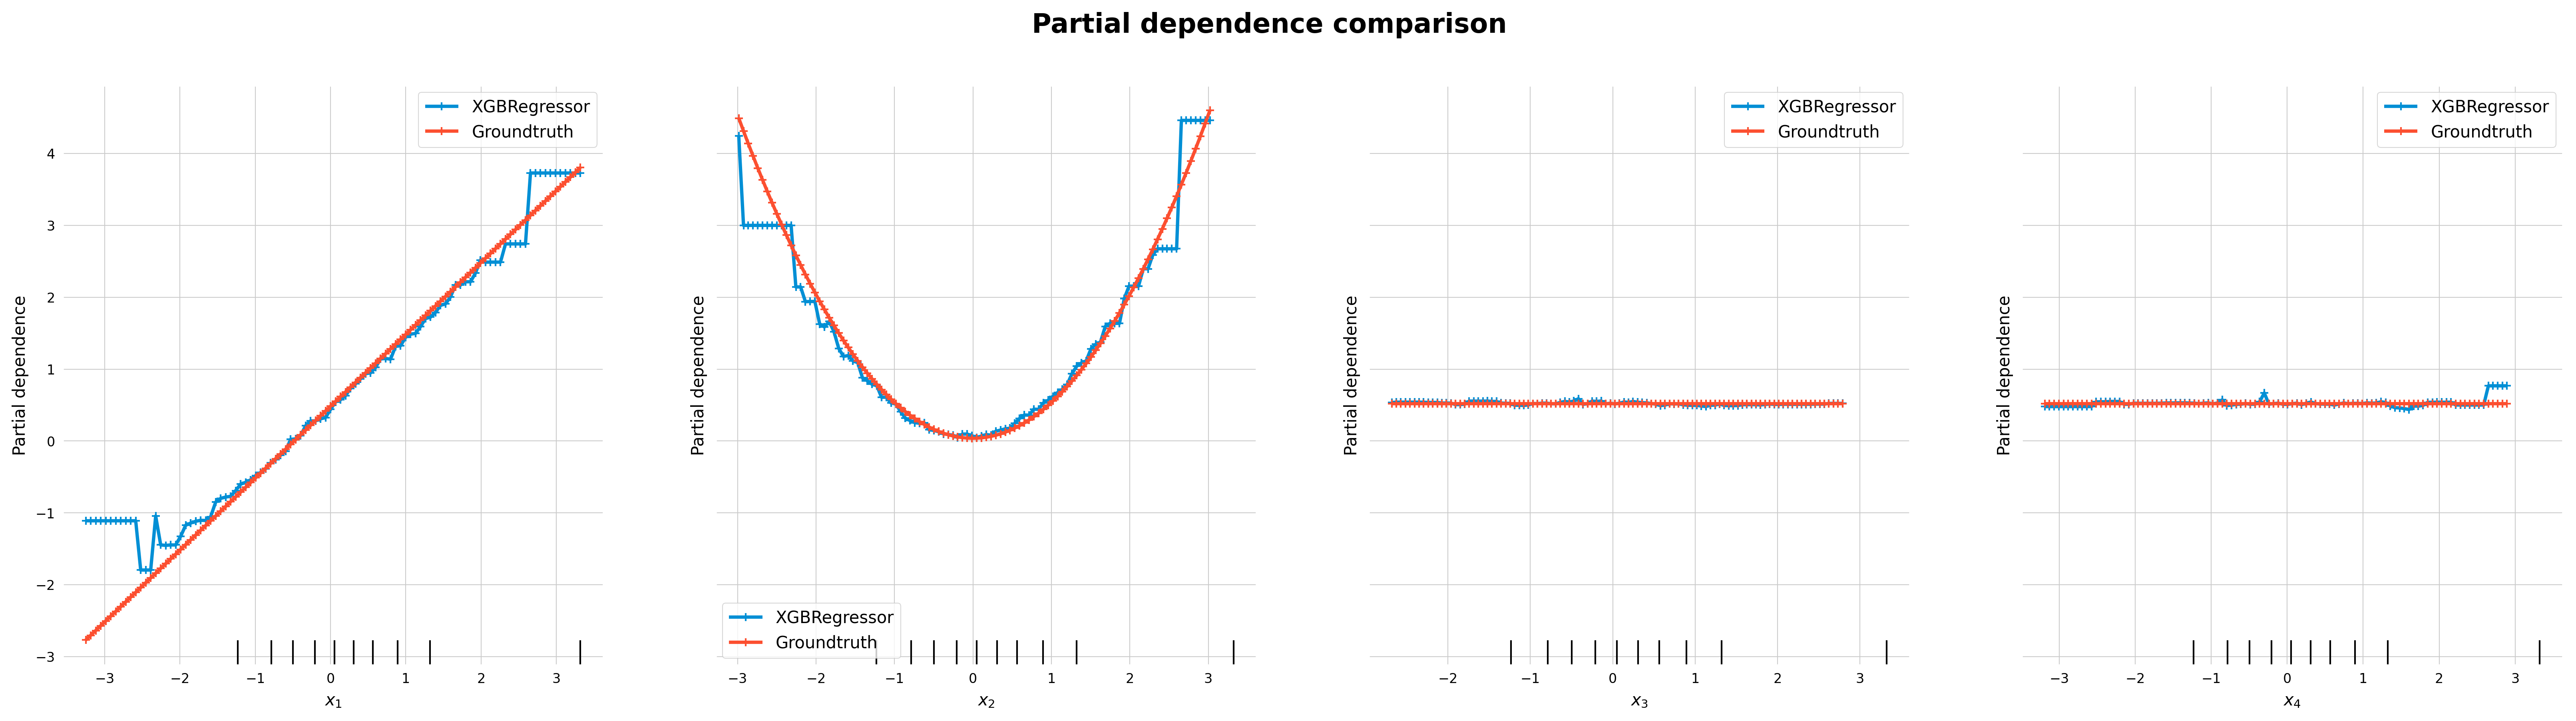

In [11]:
%matplotlib inline
plot_effect_comparison(xgb_cor, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

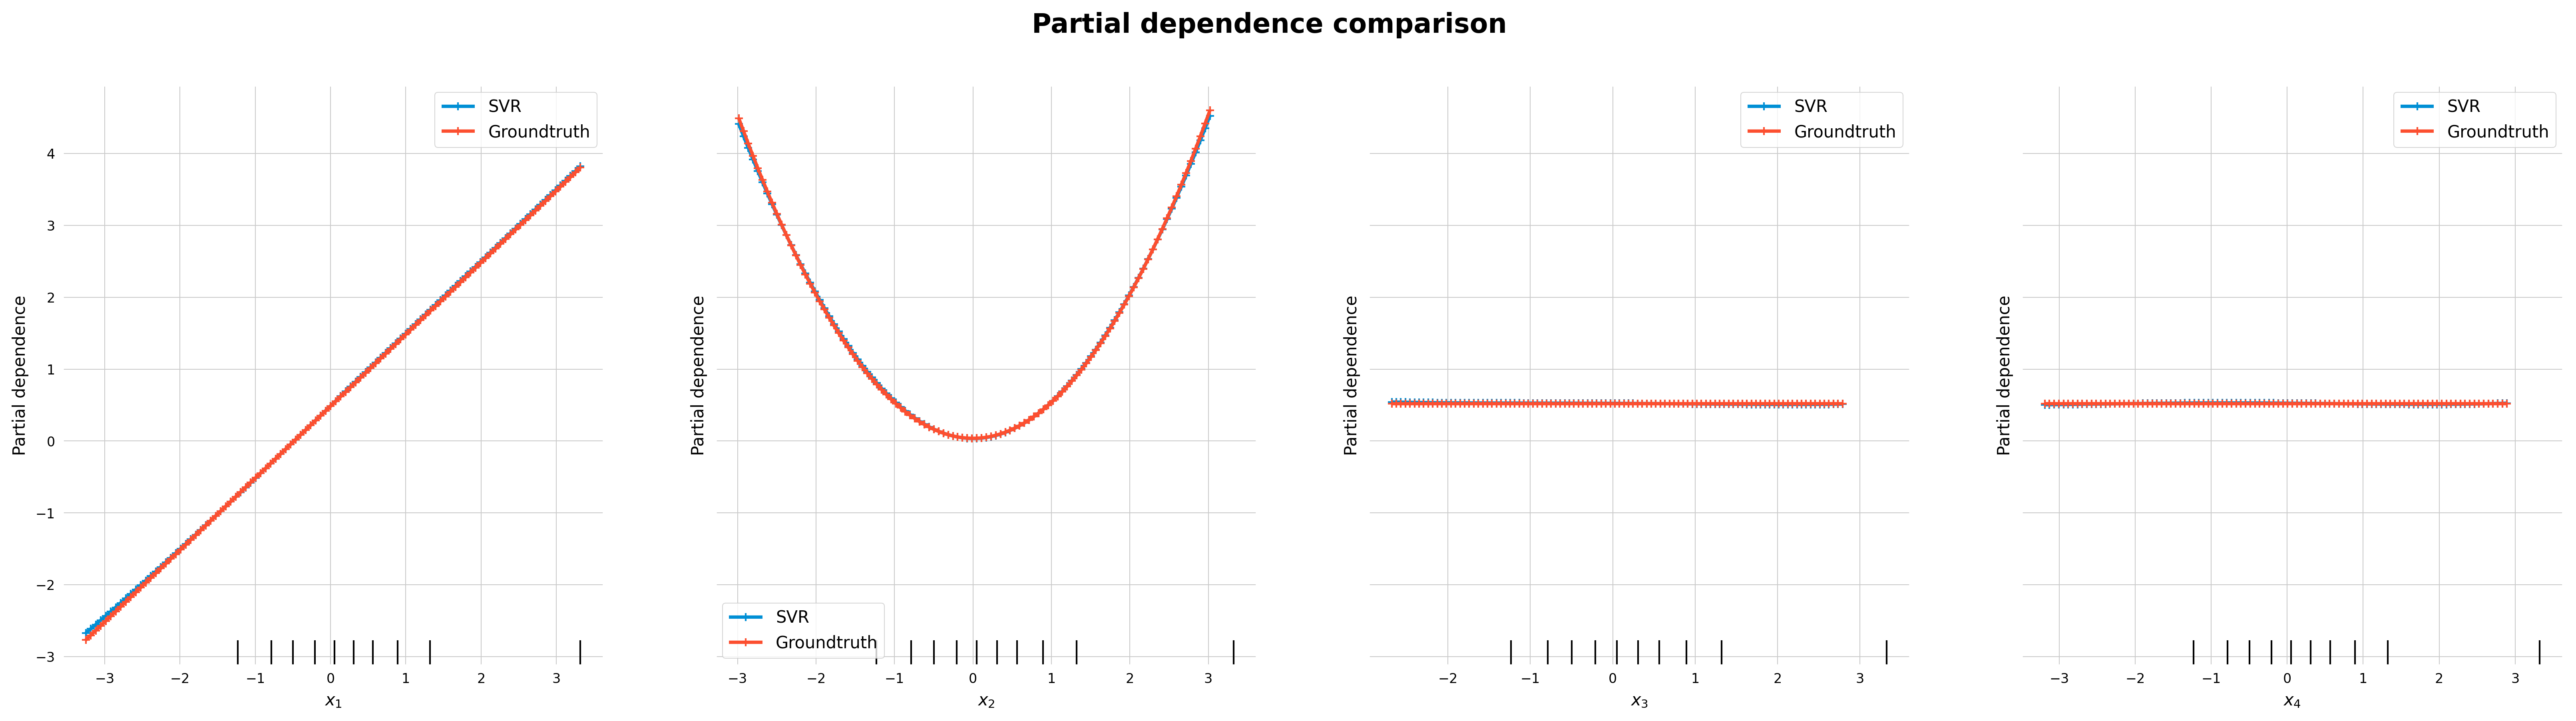

In [12]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

## ALE

### Error of Model-ALE compared to groundtruth-ALE

In [13]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("ale_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,mean_squared_error,0.093215,0.282560,0.001980,0.001340
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.070511,0.300384,0.000964,0.000726
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.000556,0.002820,0.000033,0.000086
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,mean_squared_error,0.000668,0.000573,0.000000,0.000000
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.000956,0.000616,0.000256,0.000410
...,...,...,...,...,...,...,...,...,...,...,...
152,0,SVM-RBF_16_1000_10,SVM-RBF,16,1000,10.0,mean_squared_error,0.001449,0.007661,0.000164,0.000023
153,0,GAM-2add-cor_16_1000_10,GAM-2add-cor,16,1000,10.0,mean_squared_error,0.001116,0.000928,0.000000,0.000000
154,0,GAM-4-full_16_1000_10,GAM-4-full,16,1000,10.0,mean_squared_error,0.001067,0.001146,0.000273,0.000205
155,0,XGBoost-2add-cor_16_1000_5,XGBoost-2add-cor,16,1000,5.0,mean_squared_error,0.075259,0.511045,0.002306,0.003173


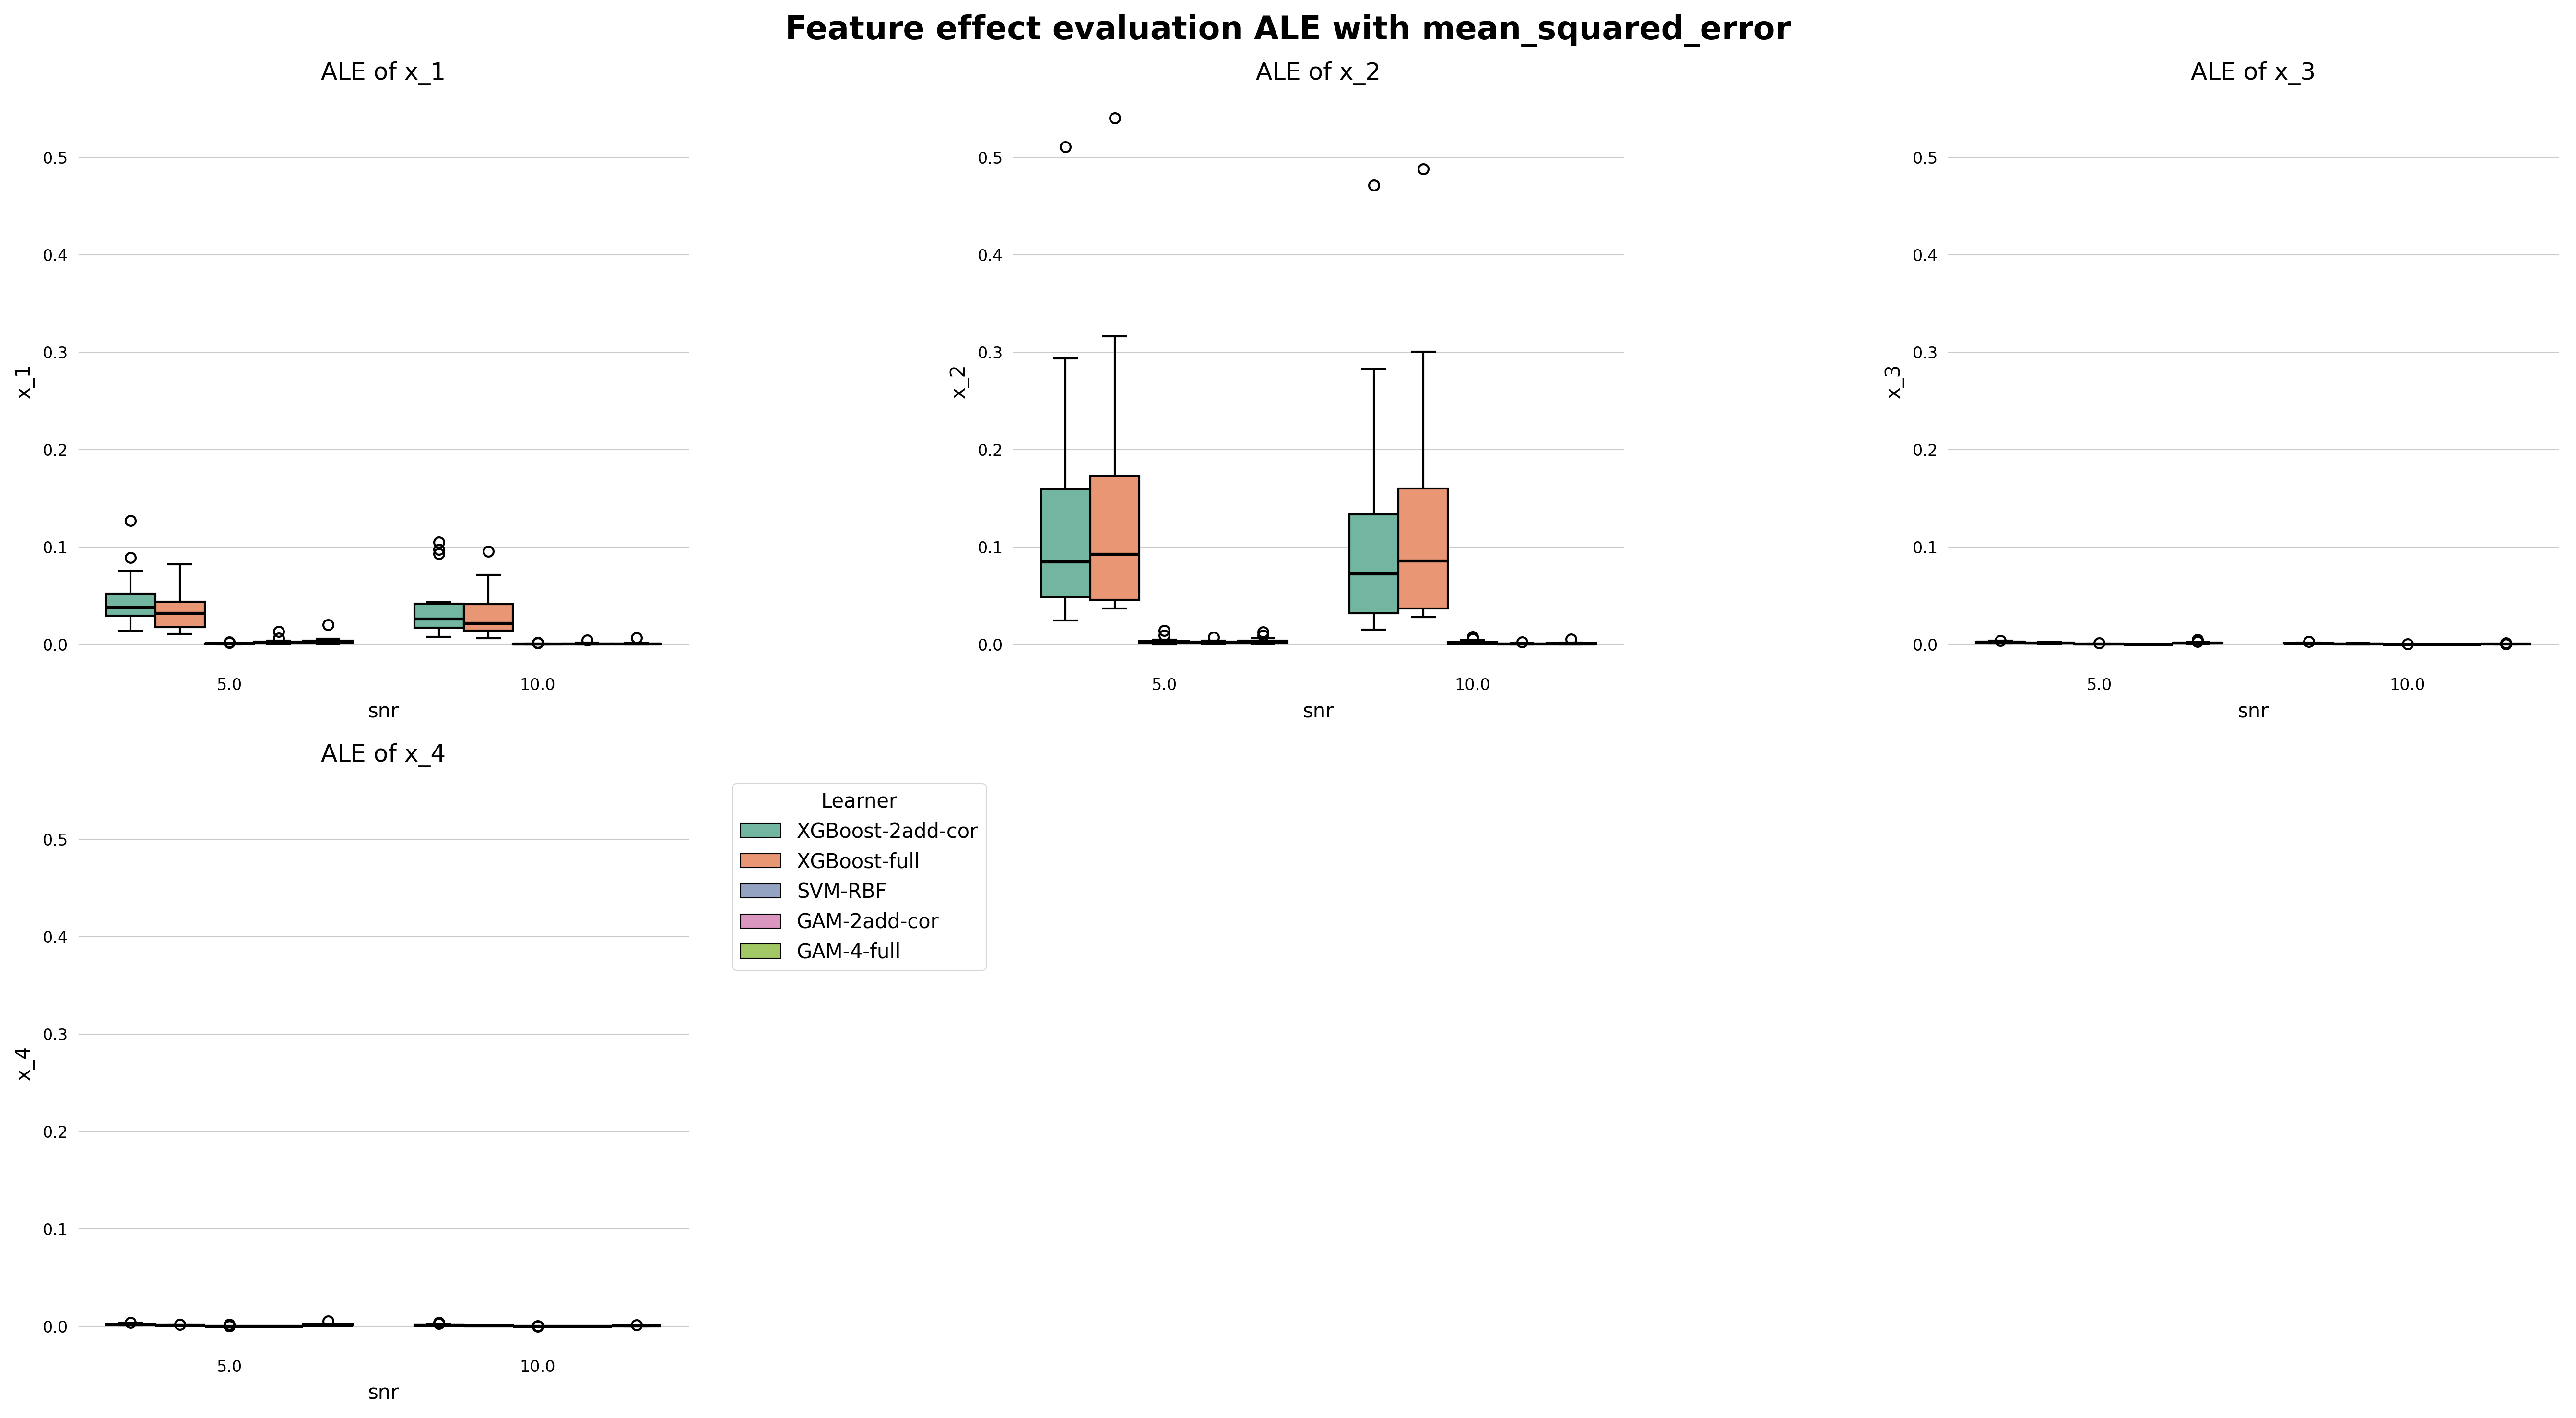

In [14]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4"], df=df, effect_type="ALE");

### ALE example visualizations

In [15]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={snr})")

(simulation no. 1 with n_train=1000 and noise_sd=10)

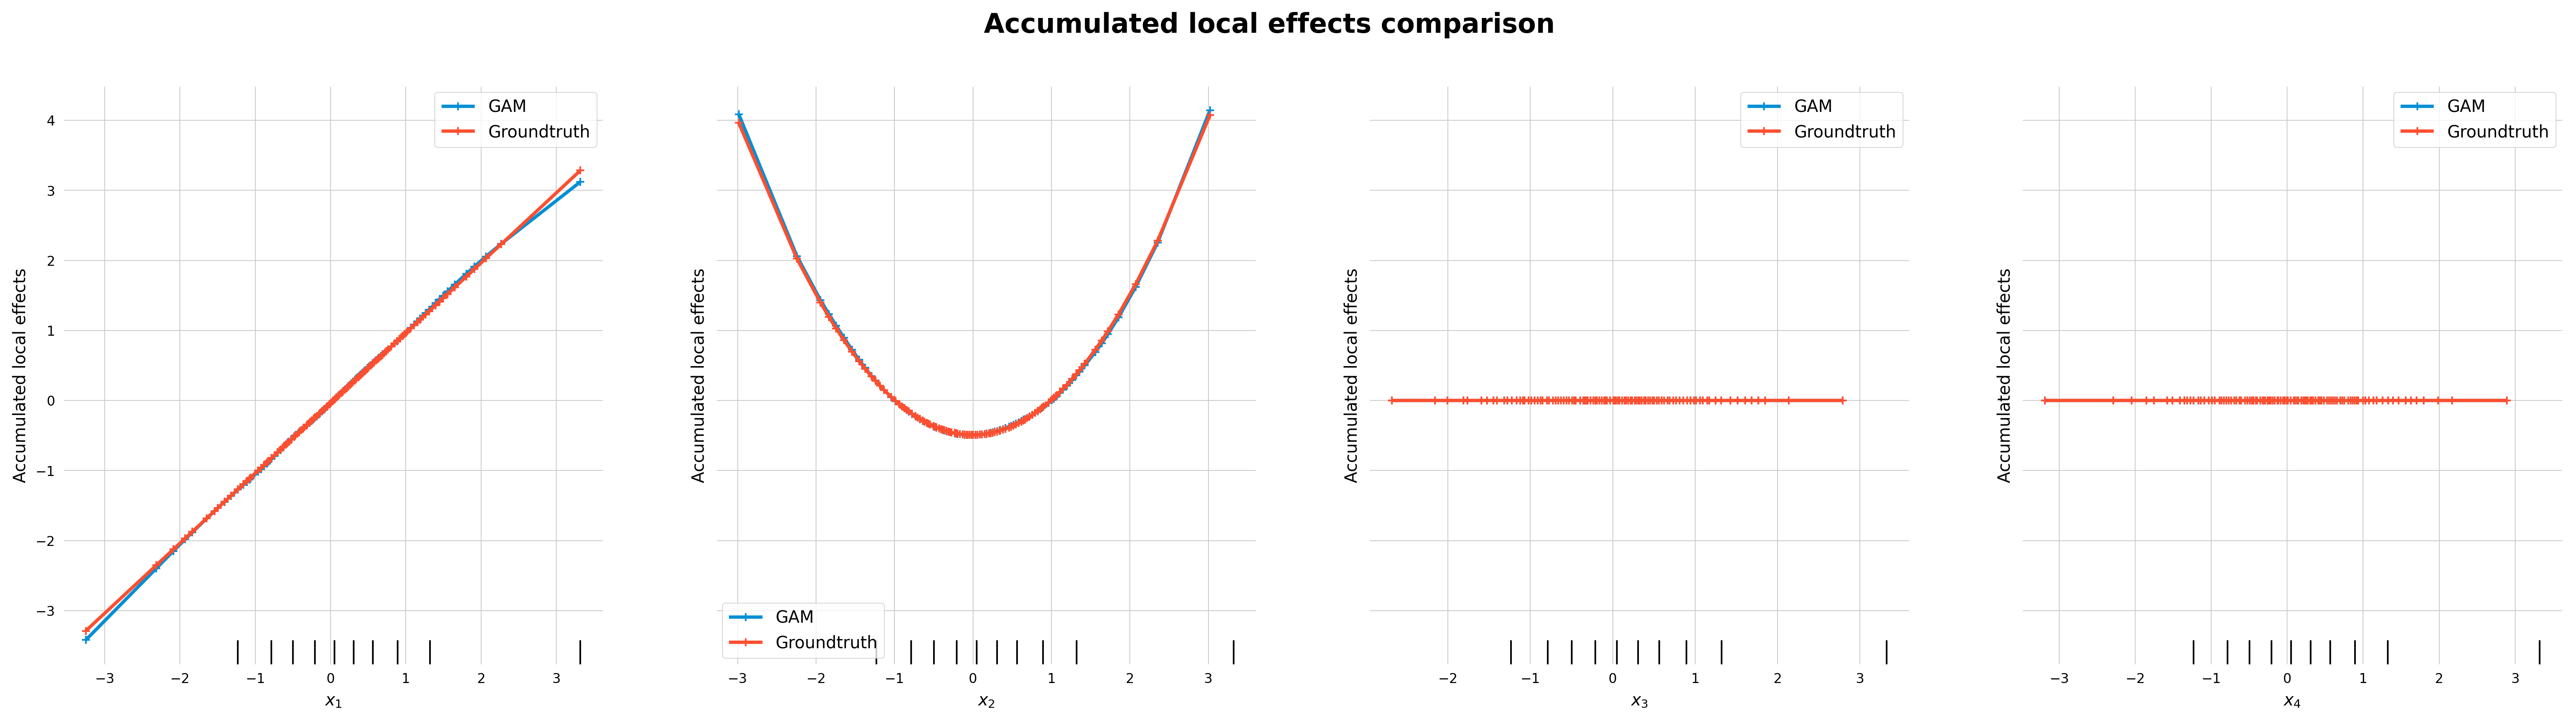

In [16]:
%matplotlib inline
plot_effect_comparison(gam_cor, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

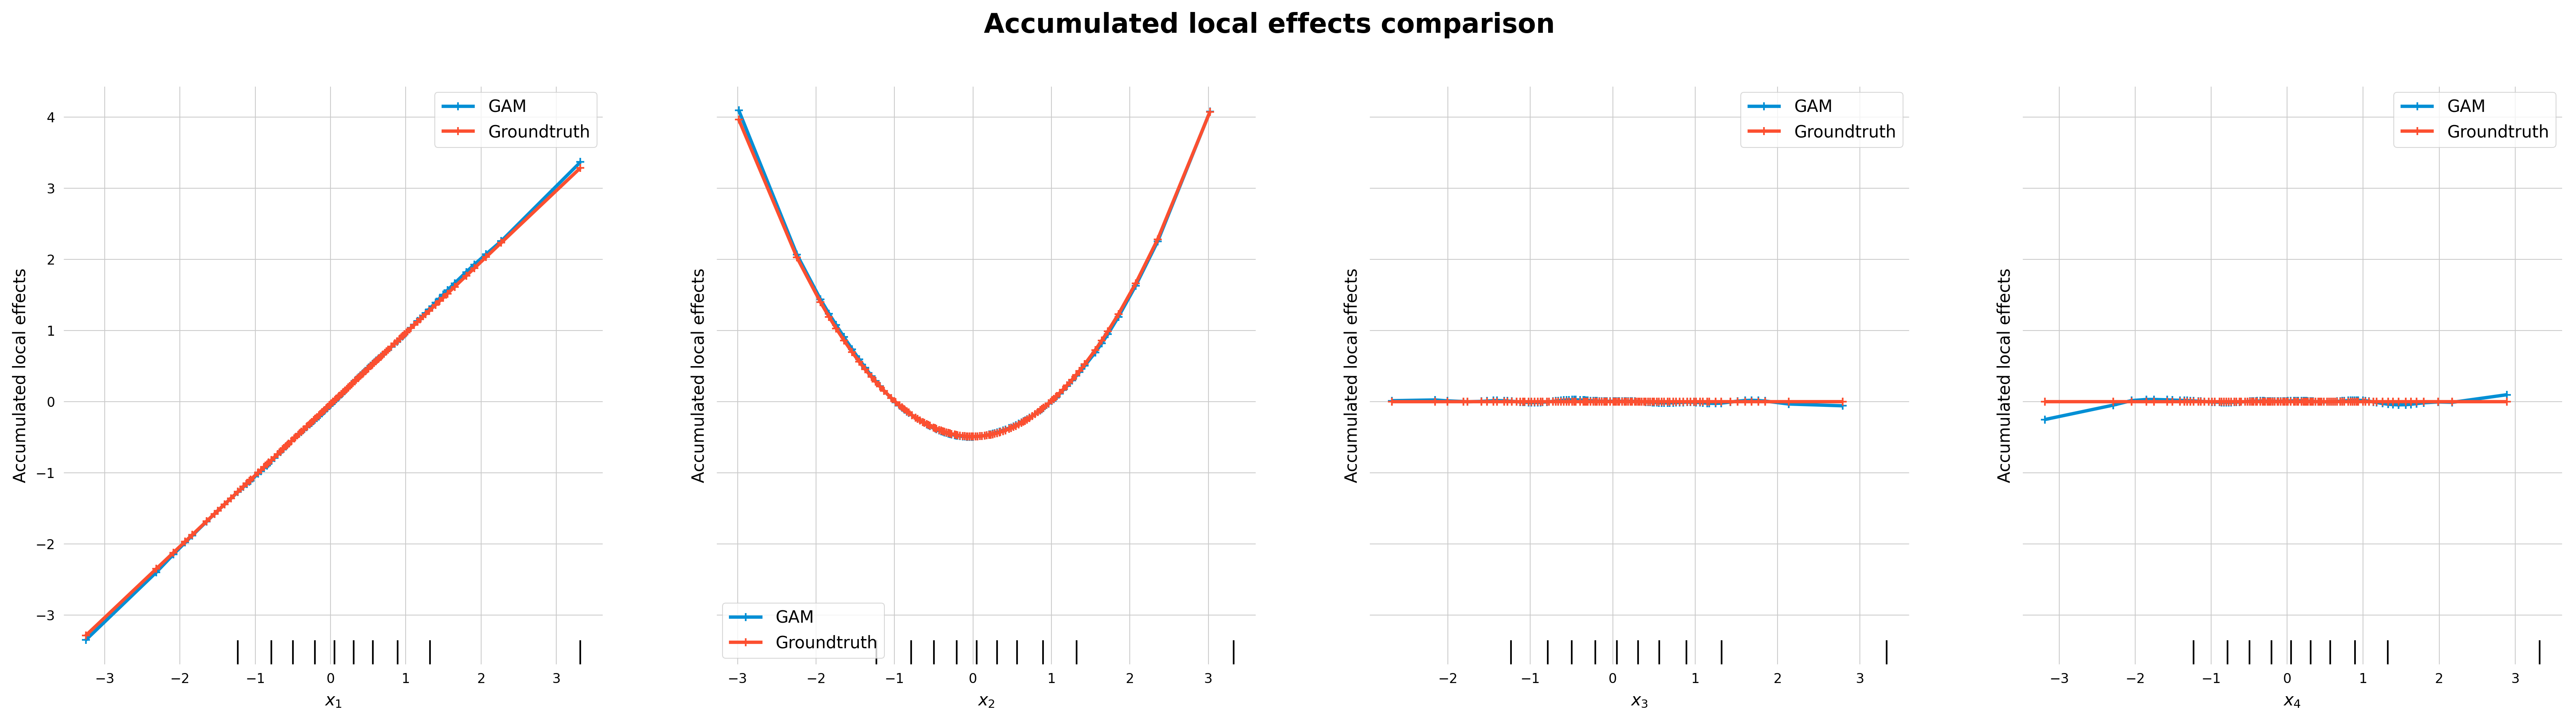

In [17]:
%matplotlib inline
plot_effect_comparison(gam_full, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

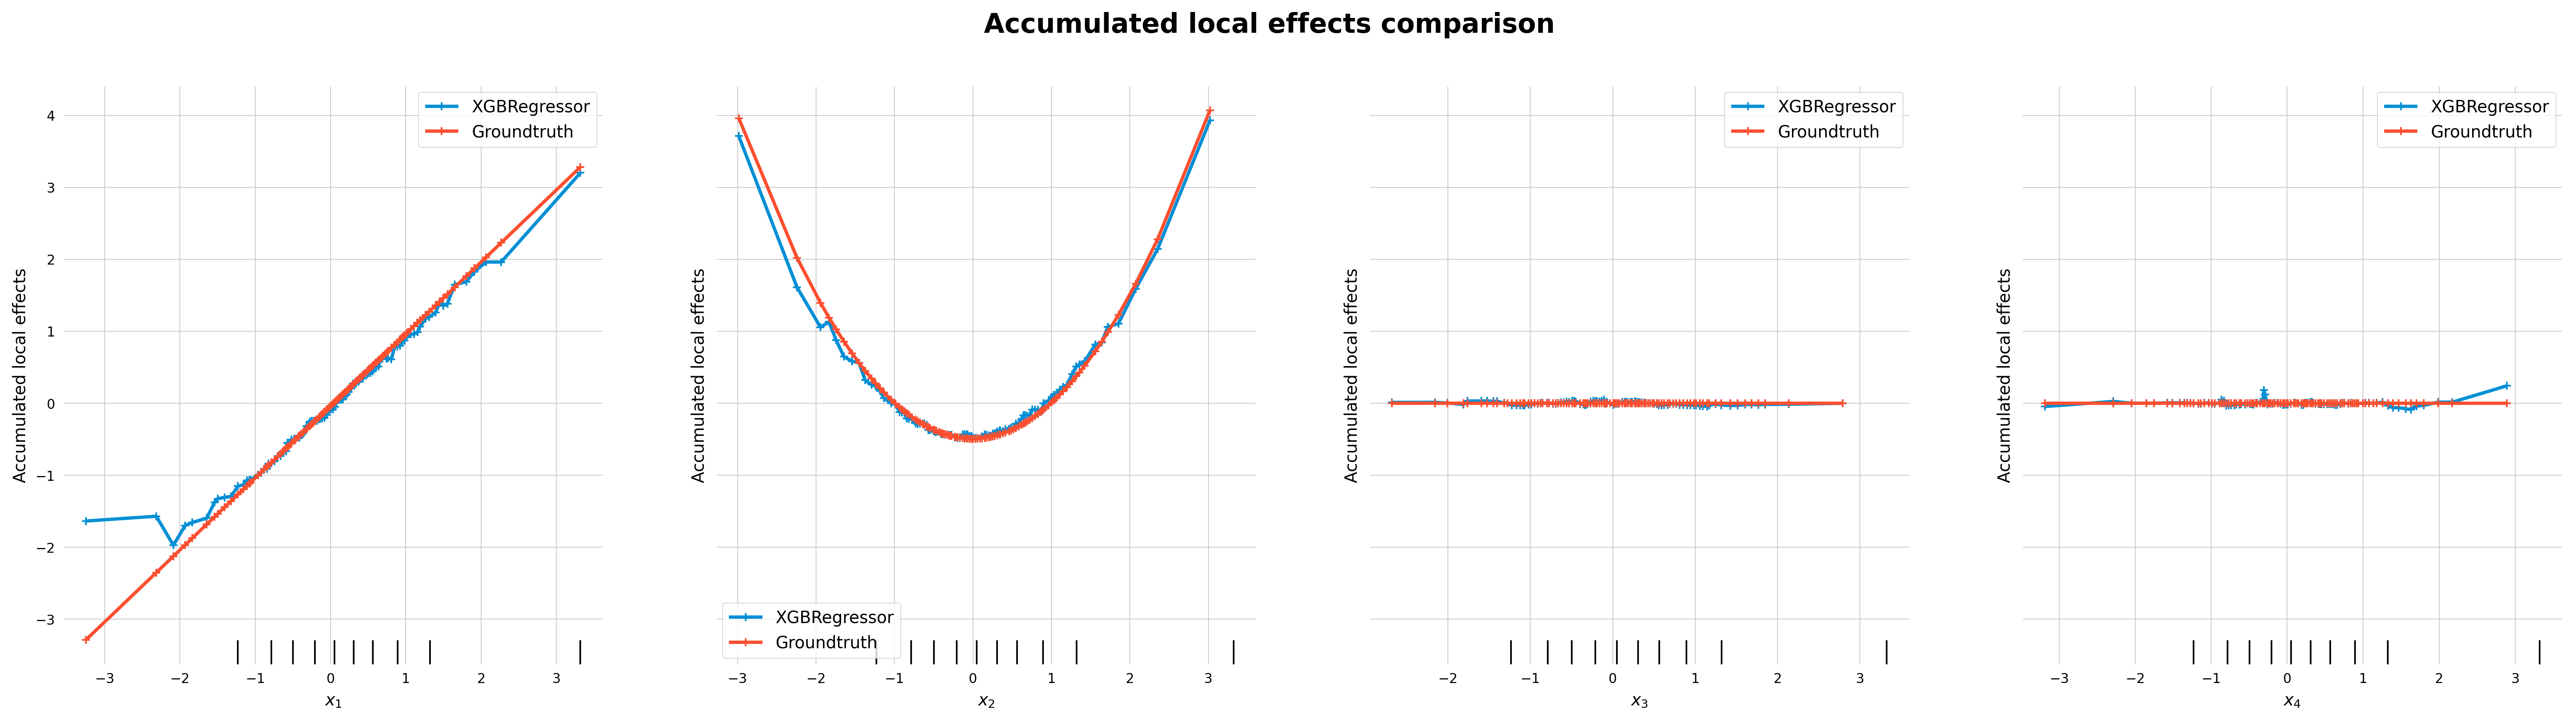

In [18]:
%matplotlib inline
plot_effect_comparison(xgb_cor, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

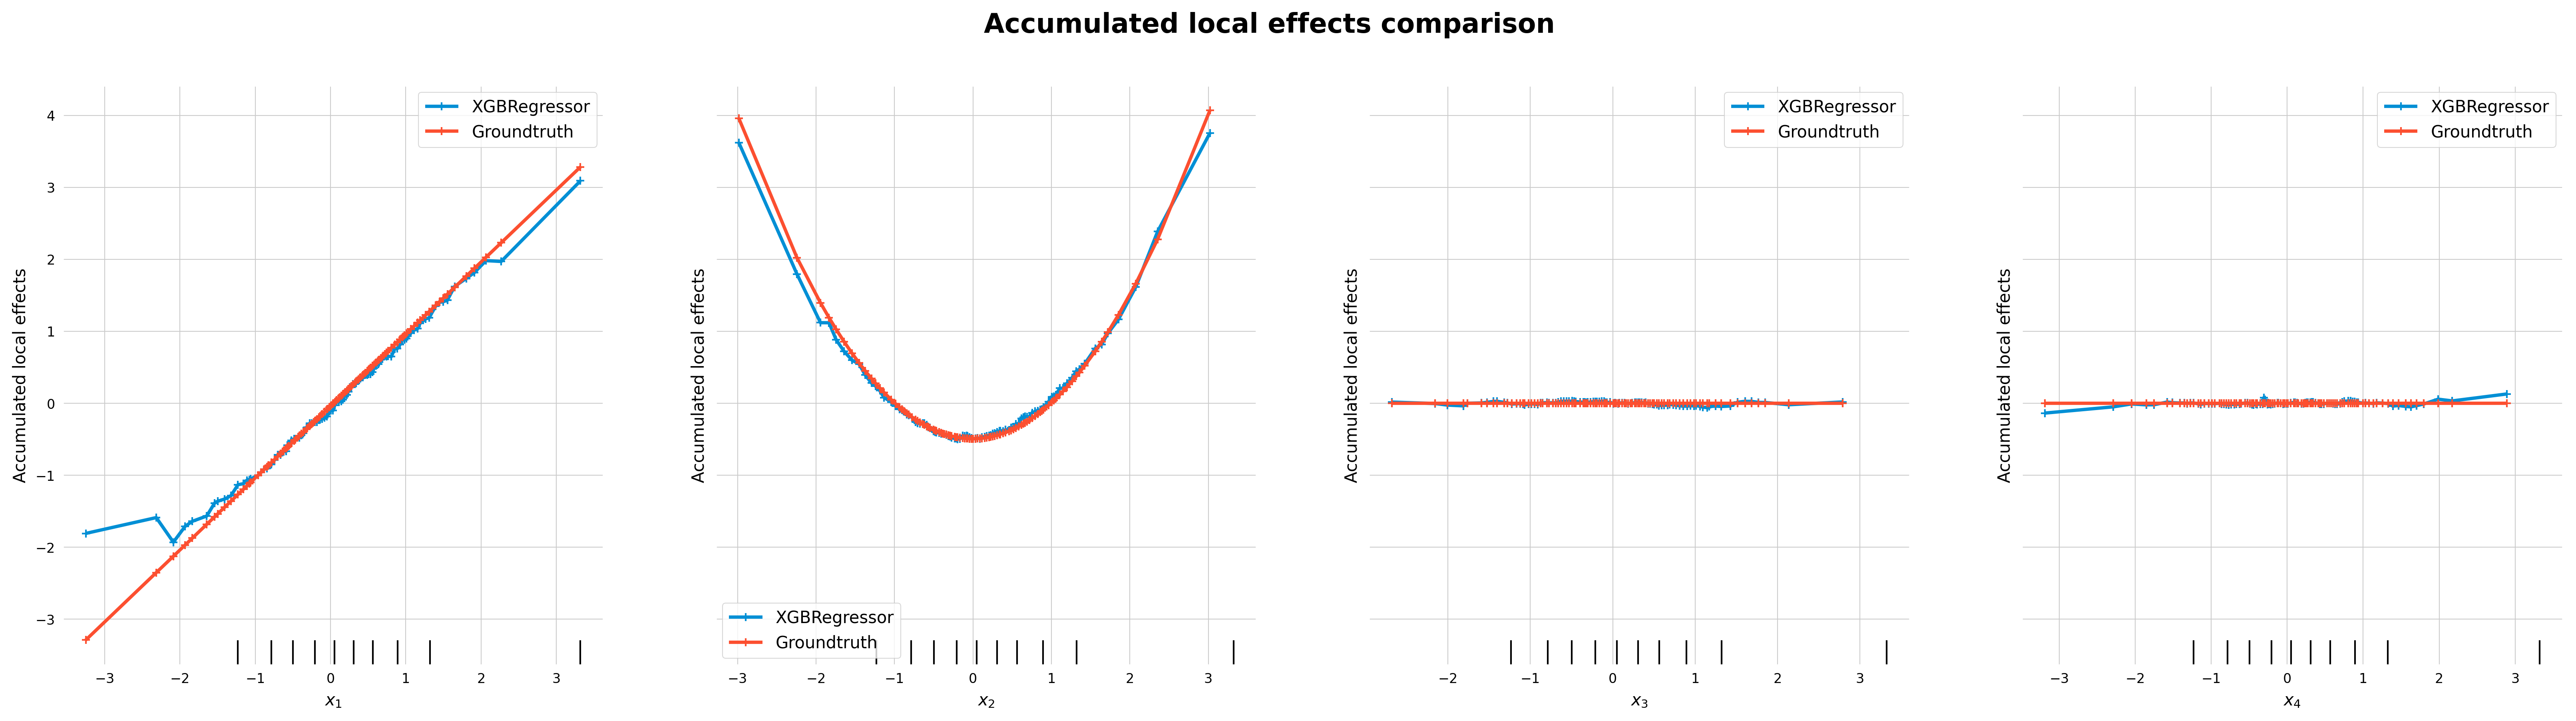

In [19]:
%matplotlib inline
plot_effect_comparison(xgb_full, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

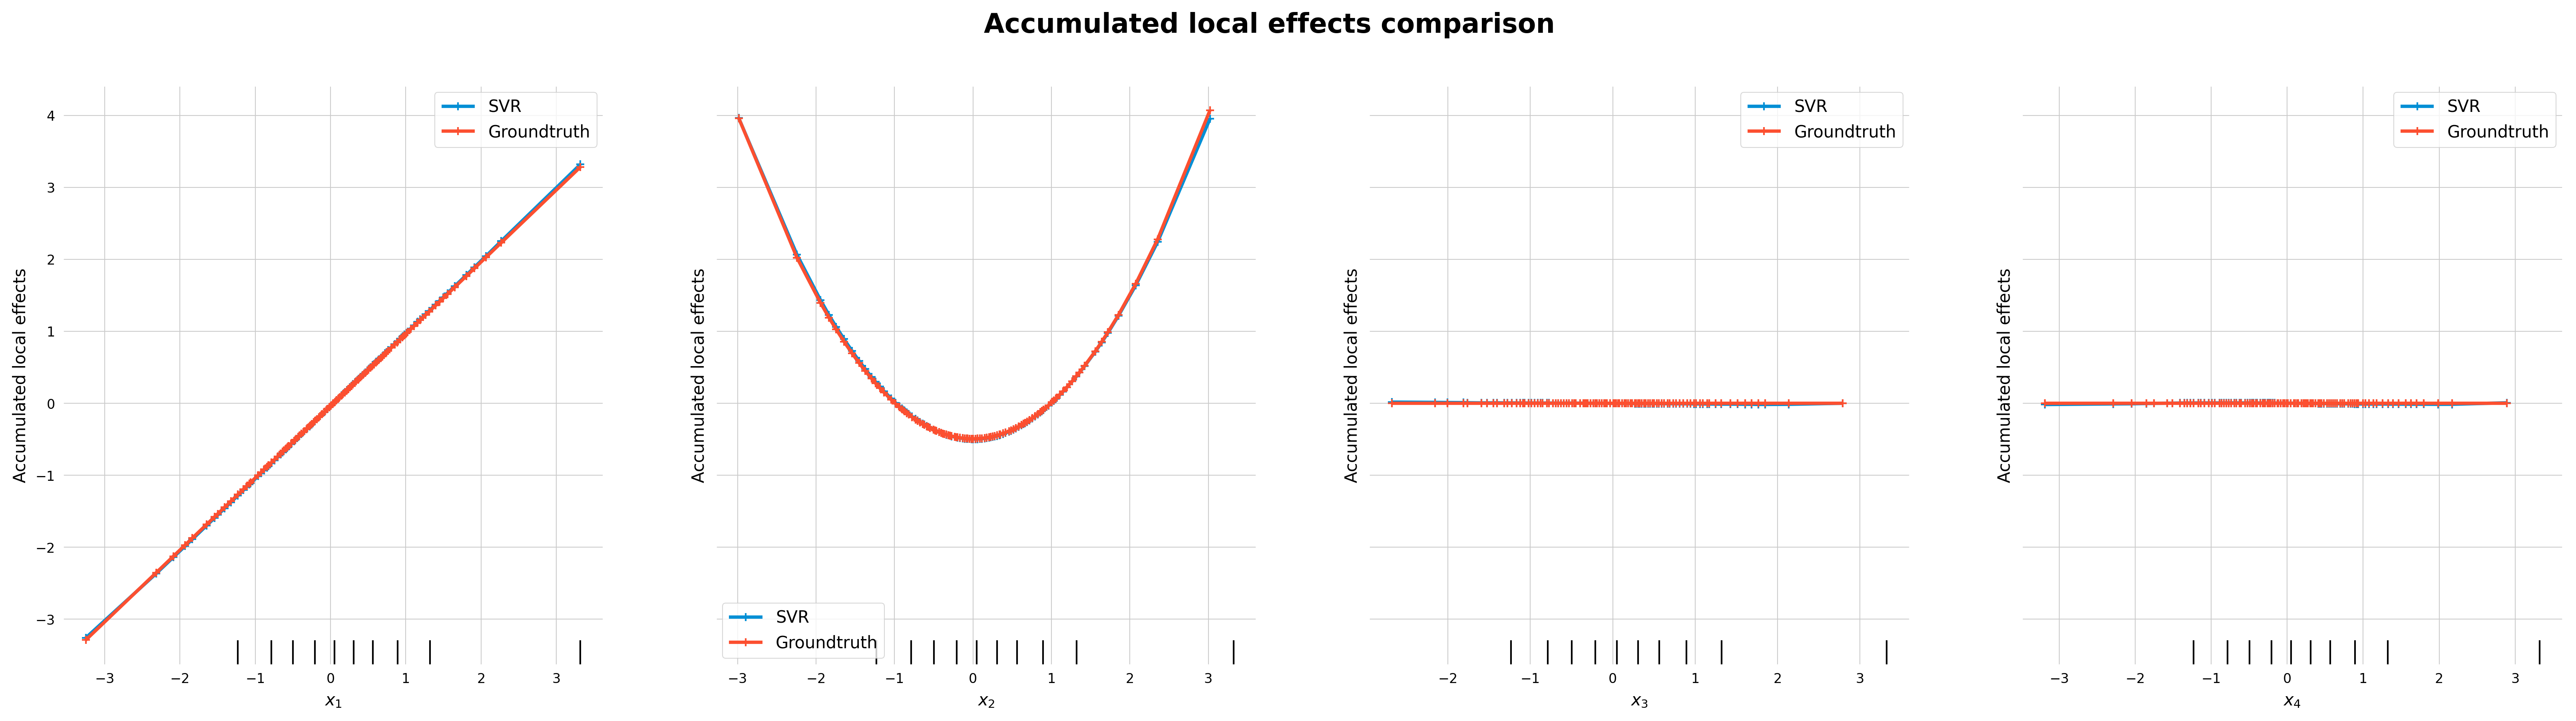

In [20]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);